In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

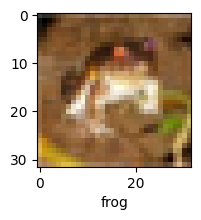

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
#Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8138 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6259 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5464 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4844 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4346 - accuracy: 0.4956


In [ ]:
#You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.45      0.52      1000
           1       0.41      0.82      0.55      1000
           2       0.29      0.59      0.39      1000
           3       0.43      0.18      0.26      1000
           4       0.59      0.18      0.27      1000
           5       0.40      0.40      0.40      1000
           6       0.54      0.50      0.52      1000
           7       0.55      0.56      0.55      1000
           8       0.67      0.53      0.59      1000
           9       0.56      0.43      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [ ]:
#Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4908 - accuracy: 0.4677
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1248 - accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9938 - accuracy: 0.6531
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9181 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8570 - accuracy: 0.7031
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8001 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7545 - accuracy: 0.7388
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7140 - accuracy: 0.7524
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6761 - accuracy: 0.7648
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.641

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9579 - accuracy: 0.6846


[0.957895040512085, 0.6845999956130981]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

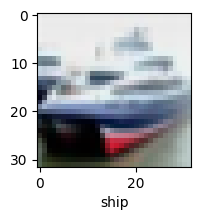

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.8609849e-04, 3.8533390e-06, 5.5606957e-03, 7.3140448e-01,
        4.7120382e-03, 2.0198114e-01, 5.5566538e-02, 2.0468717e-04,
        1.7964591e-04, 8.5603097e-07],
       [9.9537140e-03, 7.8679299e-01, 1.4085906e-05, 4.7477271e-05,
        9.6005465e-07, 3.3512857e-05, 1.8336965e-05, 8.7530461e-06,
        1.9863915e-01, 4.4911476e-03],
       [6.2154967e-02, 2.7132404e-01, 2.8228292e-03, 1.0633567e-02,
        6.6984730e-04, 4.5682150e-03, 1.2886022e-03, 4.4044670e-02,
        5.6865180e-01, 3.3841405e-02],
       [9.8869288e-01, 4.3313380e-04, 2.7632762e-03, 7.8778109e-04,
        2.5272823e-03, 9.0606060e-05, 6.2948629e-06, 7.6679680e-05,
        4.4342536e-03, 1.8784094e-04],
       [4.1660951e-05, 1.8210201e-04, 2.5634879e-01, 7.8981690e-02,
        1.3023910e-01, 2.7282374e-02, 5.0675154e-01, 2.8685749e-06,
        1.6755228e-04, 2.4093497e-06]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

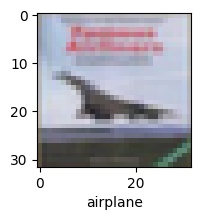

In [ ]:
plot_sample(X_test,y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.45      0.52      1000
           1       0.41      0.82      0.55      1000
           2       0.29      0.59      0.39      1000
           3       0.43      0.18      0.26      1000
           4       0.59      0.18      0.27      1000
           5       0.40      0.40      0.40      1000
           6       0.54      0.50      0.52      1000
           7       0.55      0.56      0.55      1000
           8       0.67      0.53      0.59      1000
           9       0.56      0.43      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000

